In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
import os
os.chdir('C:\\Users\\Admin\\Desktop\\Virtual Internship\\KPMG')

In [3]:
Transactions= pd.read_excel('KPMG_raw.xlsx',
                  sheet_name= 'Transactions', 
                  header=1)
CustomerDemo= pd.read_excel('KPMG_raw.xlsx',
                  sheet_name= "CustomerDemographic", 
                  header=1)
CustomerAddress= pd.read_excel('KPMG_raw.xlsx',
                  sheet_name= 'CustomerAddress', 
                  header=1)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  


In [4]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [5]:
def Time(ExcelFloat):
    seconds= (ExcelFloat - 25569) * 86400.0
    PythonDate= datetime.datetime.utcfromtimestamp(seconds).strftime("%Y-%m-%d")
    return PythonDate
Transactions['product_first_sold_date']= Transactions['product_first_sold_date'].map(lambda x: Time(x),  na_action='ignore')
Transactions.head(10)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10
5,6,25,2339,2017-03-08,1.0,Approved,Giant Bicycles,Road,medium,medium,1538.99,829.65,2006-11-10
6,7,22,1542,2017-04-21,1.0,Approved,WeareA2B,Standard,medium,medium,60.34,45.26,1993-07-15
7,8,15,2459,2017-07-15,0.0,Approved,WeareA2B,Standard,medium,medium,1292.84,13.44,2009-04-12
8,9,67,1305,2017-08-10,0.0,Approved,Solex,Standard,medium,large,1071.23,380.74,1991-08-05
9,10,12,3262,2017-08-30,1.0,Approved,WeareA2B,Standard,medium,medium,1231.15,161.60,2004-08-17


In [6]:
Transactions.nunique(axis= 0)

transaction_id             20000
product_id                   101
customer_id                 3494
transaction_date             364
online_order                   2
order_status                   2
brand                          6
product_line                   4
product_class                  3
product_size                   3
list_price                   296
standard_cost                103
product_first_sold_date      100
dtype: int64

In [7]:
Transactions.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [8]:
#Check missing values
Transactions[Transactions['brand'].isnull() & Transactions['product_line'].isnull() & Transactions['product_class'].isnull() & Transactions['product_size'].isnull()]


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
136,137,0,431,2017-09-23,0.0,Approved,NaN,NaN,NaN,NaN,1942.61,NaN,NaN
159,160,0,3300,2017-08-27,0.0,Approved,NaN,NaN,NaN,NaN,1656.86,NaN,NaN
366,367,0,1614,2017-03-10,0.0,Approved,NaN,NaN,NaN,NaN,850.89,NaN,NaN
406,407,0,2559,2017-06-14,1.0,Approved,NaN,NaN,NaN,NaN,710.59,NaN,NaN
676,677,0,2609,2017-07-02,0.0,Approved,NaN,NaN,NaN,NaN,1972.01,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19340,19341,0,443,2017-12-26,1.0,Approved,NaN,NaN,NaN,NaN,744.54,NaN,NaN
19383,19384,0,2407,2017-06-11,0.0,Approved,NaN,NaN,NaN,NaN,1098.18,NaN,NaN
19793,19794,0,2860,2017-01-13,0.0,Approved,NaN,NaN,NaN,NaN,868.56,NaN,NaN
19859,19860,0,2468,2017-06-24,1.0,Approved,NaN,NaN,NaN,NaN,1497.43,NaN,NaN


array([[<AxesSubplot:xlabel='list_price', ylabel='list_price'>,
        <AxesSubplot:xlabel='standard_cost', ylabel='list_price'>],
       [<AxesSubplot:xlabel='list_price', ylabel='standard_cost'>,
        <AxesSubplot:xlabel='standard_cost', ylabel='standard_cost'>]],
      dtype=object)

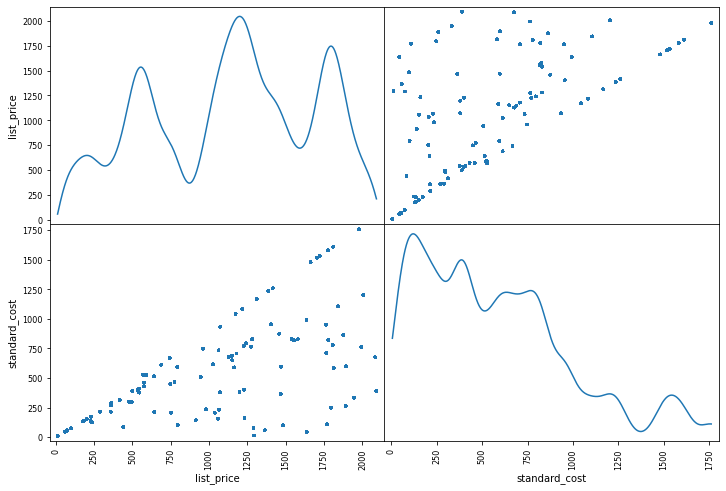

In [9]:
from pandas.plotting import scatter_matrix
attributes = ["list_price", "standard_cost"]#, 'profit']#, "transaction_date","product_id", "product_first_sold_date"] 
scatter_matrix(Transactions[attributes], figsize=(12, 8), diagonal= 'kde')

In [10]:
Transactions['product_id'].value_counts().sort_values()

47      121
100     130
8       136
16      136
71      137
       ... 
38      267
35      268
1       311
3       354
0      1378
Name: product_id, Length: 101, dtype: int64

> product_ids are not identical so we cannot retrieve missing values by product id

In [11]:
Transactions.corr()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost
transaction_id,1.000000,-0.011486,0.001753,0.003394,-0.006154,-0.003291
product_id,-0.011486,1.000000,0.004278,-0.004233,0.090066,0.038765
customer_id,0.001753,0.004278,1.000000,0.001616,0.009306,0.005365
online_order,0.003394,-0.004233,0.001616,1.000000,-0.000295,0.006934
list_price,-0.006154,0.090066,0.009306,-0.000295,1.000000,0.551539
standard_cost,-0.003291,0.038765,0.005365,0.006934,0.551539,1.000000


> list price and standard cost are somewhat correlated

In [12]:
#Since all of missing product information have product id 0, check product id = 0
#Product_id0= Transactions[['product_id', 'list_price', 'standard_cost']]
Product_id0= Transactions[Transactions['product_id']== 0]
Product_id0.corr()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost
transaction_id,1.000000,NaN,-0.032233,0.061190,0.009176,-0.052119
product_id,NaN,NaN,NaN,NaN,NaN,NaN
customer_id,-0.032233,NaN,1.000000,-0.012742,-0.039368,0.013804
online_order,0.061190,NaN,-0.012742,1.000000,-0.007883,-0.010678
list_price,0.009176,NaN,-0.039368,-0.007883,1.000000,0.931967
standard_cost,-0.052119,NaN,0.013804,-0.010678,0.931967,1.000000


> list price and standard cost are highly correlated between products which have id = 0

In [13]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.compat import lzip
model = smf.ols('standard_cost~ list_price', data= Product_id0).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          standard_cost   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     7791.
Date:                Sat, 10 Dec 2022   Prob (F-statistic):               0.00
Time:                        23:24:28   Log-Likelihood:                -6312.6
No. Observations:                1181   AIC:                         1.263e+04
Df Residuals:                    1179   BIC:                         1.264e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.7453      2.923     -1.966      0.050     -11.480      -0.011
list_price     0.7263      0.008     88.267      0.000       0.710       0.742
==============================================================================
Omnibus:                      602.978   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6055.132
Skew:                          -2.136   Prob(JB):                         0.00
Kurtosis:                      13.237   Cond. No.                         703.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> Good fit -> Impute missing values by linear regression

In [14]:
ImpDf= Product_id0[['list_price', 'standard_cost']]

from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
#fit lr

lr= LinearRegression()
imp = IterativeImputer(estimator= lr)
imp.fit(ImpDf)
#transform
ImpArr= imp.transform(ImpDf)
ImpDf= pd.DataFrame(ImpArr, columns= ImpDf.columns, index= ImpDf.index)

#Concat
Product_id0.drop(['list_price', 'standard_cost'], axis= 1, inplace= True)
Product_id0= pd.concat([Product_id0, ImpDf], axis= 1)

Transactions= Transactions[Transactions['product_id']!=0]
Transactions= pd.concat([Transactions, Product_id0], axis= 0)


C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [15]:
Transactions.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost                0
product_first_sold_date    197
dtype: int64

In [16]:
#Add feature profit
Transactions['profit']= Transactions['list_price']-Transactions['standard_cost']

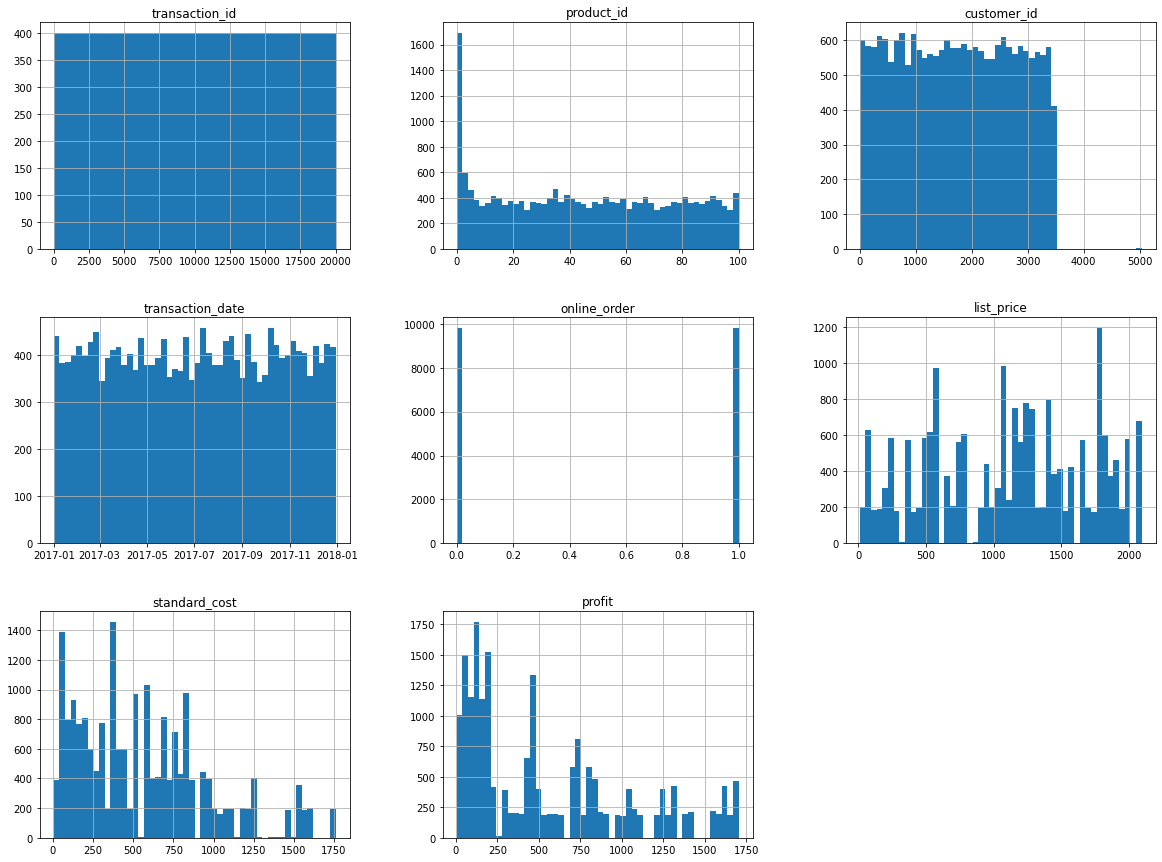

In [17]:
%matplotlib inline   
import matplotlib.pyplot as plt
Transactions.hist(bins=50,figsize=(20,15))
plt.show()

<AxesSubplot:ylabel='Frequency'>

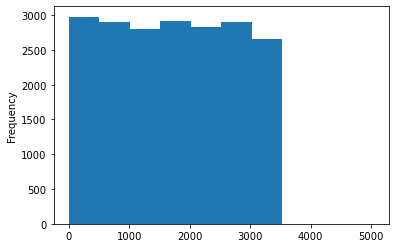

In [18]:
Transactions['customer_id'].plot(kind= 'hist')

>This dataset contains customer with id from 0 to 3500

In [19]:
#This customer should not be included
Transactions.loc[Transactions['customer_id'].max()]

transaction_id                            5035
product_id                                   0
customer_id                               1839
transaction_date           2017-07-25 00:00:00
online_order                               0.0
order_status                          Approved
brand                           Norco Bicycles
product_line                              Road
product_class                           medium
product_size                            medium
list_price                              544.05
standard_cost                           376.84
product_first_sold_date             2000-05-22
profit                                  167.21
Name: 5034, dtype: object

### Product Exploration

<AxesSubplot:xlabel='brand', ylabel='profit'>

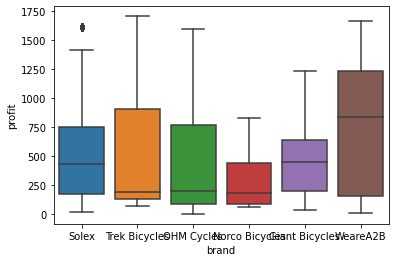

In [20]:
sns.boxplot(x= 'brand', y= 'profit', data= Transactions)

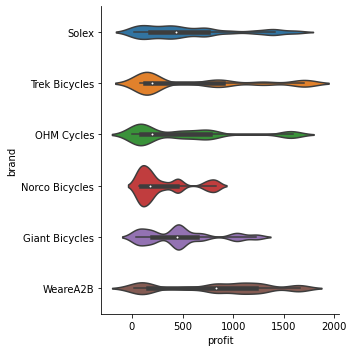

In [21]:
sns.catplot(y= 'brand', x= 'profit', kind= "violin", data= Transactions)

<AxesSubplot:xlabel='product_line', ylabel='profit'>

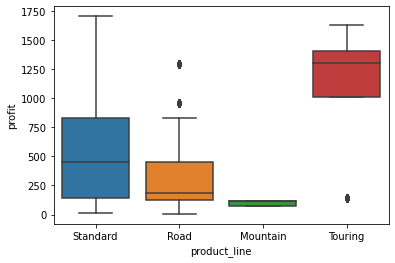

In [22]:
sns.boxplot(x= 'product_line', y= 'profit', data= Transactions)

<AxesSubplot:xlabel='product_size', ylabel='profit'>

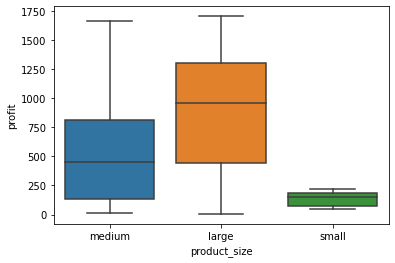

In [23]:
sns.boxplot(x= 'product_size', y= 'profit', data= Transactions)

<AxesSubplot:xlabel='product_class', ylabel='profit'>

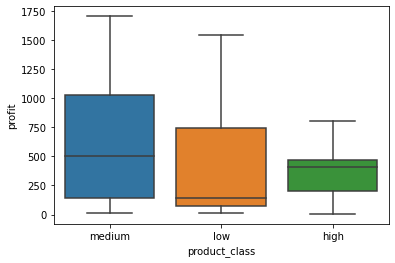

In [24]:
sns.boxplot(x= 'product_class', y= 'profit', data= Transactions)

### Market Basket Analysis

In [26]:
import warnings
warnings.filterwarnings('ignore')

In [27]:
Transactions['product_sum']= Transactions['brand']+ ' '+ Transactions['product_line']+ ' '+ Transactions['product_class']+ ' '+ Transactions['product_size']+ ' '+ Transactions['profit'].apply(lambda x: np.str(x))#+ ' ' +Transactions['product_first_sold_date'].apply(lambda x: np.str(x))

In [32]:
# Transactions['product_sum'].apply(str)
product_df= Transactions.groupby('customer_id').agg({'product_sum': lambda x: list(x[x.notna()]),
                                                     'profit': 'sum'
                                                    })
#product_df= product_df.sort_values(by= 'profit').tail(350)
product_arr= np.array(product_df['product_sum'].tolist())
print(product_df)

                                                   product_sum       profit
customer_id                                                                
1            [OHM Cycles Standard medium medium 110.56, Sol...  3018.090000
2            [Giant Bicycles Standard medium medium 448.679...  2226.260000
3            [Giant Bicycles Standard medium small 144.26, ...  3362.810000
4            [Giant Bicycles Standard medium large 41.12999...   220.570000
5            [Norco Bicycles Road high large 309.8099999999...  2394.940000
...                                                        ...          ...
3497         [Giant Bicycles Standard medium medium 448.679...  1648.320000
3498         [WeareA2B Standard medium small 43.97, Solex S...  3147.330000
3499         [Giant Bicycles Standard medium medium 431.330...  4955.250000
3500         [Solex Standard medium medium 17.8699999999999...  1785.860000
5034         [Solex Road medium medium 104.24498410000001, ...   269.484972

[3494 rows 

In [33]:
import mlxtend.frequent_patterns 
import mlxtend.preprocessing
from mlxtend.frequent_patterns import apriori

encode= mlxtend.preprocessing.TransactionEncoder()

basket= encode.fit_transform(product_arr)
basket= pd.DataFrame(basket, columns= encode.columns_)
from mlxtend.frequent_patterns import association_rules

In [34]:
frequent_itemsets = apriori(basket, min_support= 0.01, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.054379,(Giant Bicycles Road low small 64.92999999999995)
1,0.057241,(Giant Bicycles Road medium medium 198.2200000...
2,0.048941,(Giant Bicycles Road medium medium 709.34)
3,0.064110,(Giant Bicycles Standard high medium 451.65000...
4,0.051231,(Giant Bicycles Standard high medium 471.6)
...,...,...
97,0.055238,(WeareA2B Touring medium large 1305.25)
98,0.063537,(WeareA2B Touring medium large 1630.25)
99,0.051803,(WeareA2B Touring medium medium 1103.43)
100,0.010017,(Giant Bicycles Standard medium medium 448.679...


In [35]:
rules = association_rules(frequent_itemsets, metric= "conviction", min_threshold= 2)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [36]:
rules_con = association_rules(frequent_itemsets, metric= "confidence", min_threshold= 0.2)
rules_con

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


> Cannot mine any rules from the set of all customer. 
It happens due to random customers who have extremely low Customer Lifetime Value( =Few purchases have been done= Poor basket).
We will try it again after segmenting customers

### Customer Exploration

In [38]:
CustomerDemo.head(10)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0
5,6,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,ðµ ð ð ð,Yes,13.0
6,7,Fina,Merali,Female,6,1976-02-23,NaN,Financial Services,Affluent Customer,N,â°â´âµâââ,Yes,11.0
7,8,Rod,Inder,Male,31,1962-03-30,Media Manager I,NaN,Mass Customer,N,(â¯Â°â¡Â°ï¼â¯ï¸µ â»ââ»),No,7.0
8,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,0/0,Yes,8.0
9,10,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,ð©ð½,Yes,20.0


In [39]:
CustomerDemo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [40]:
CustomerDemo.nunique()

customer_id                            4000
first_name                             3139
last_name                              3725
gender                                    6
past_3_years_bike_related_purchases     100
DOB                                    3448
job_title                               195
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        2
default                                  90
owns_car                                  2
tenure                                   22
dtype: int64

> This dataframe contains information of 4000 customers while the Transactions dataframe recorded only 3501 customers.
Those 501 customers who does not appear in both tables will be dropped later due to inner join

In [41]:
CustomerDemo.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

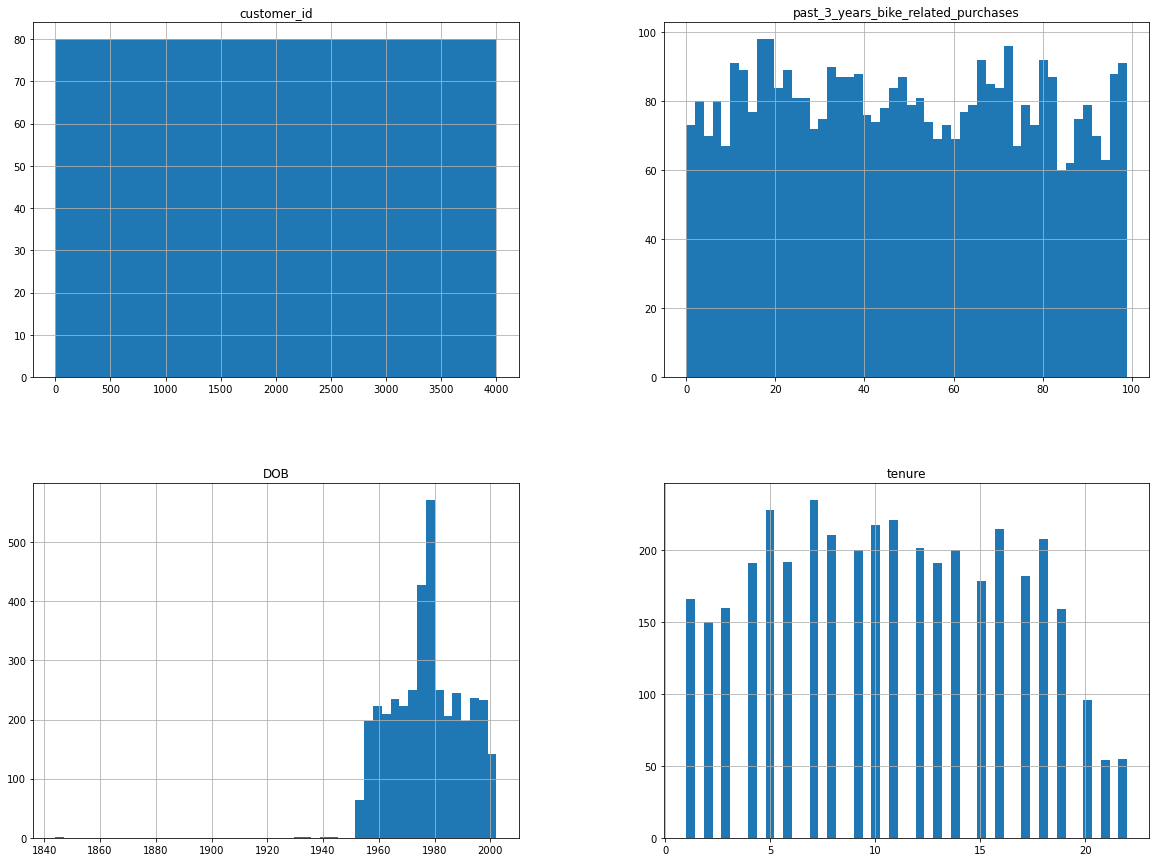

In [42]:
%matplotlib inline   
import matplotlib.pyplot as plt
CustomerDemo.hist(bins=50,figsize=(20,15))
plt.show()

> DOB outlier is detected! Will be dropped.

In [45]:
CustomerDemo.loc[CustomerDemo['DOB'].dt.year< 1900]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
33,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,NaN,No,20.0


In [46]:
CustomerDemo= CustomerDemo[CustomerDemo['DOB'].dt.year != 1843]

<AxesSubplot:>

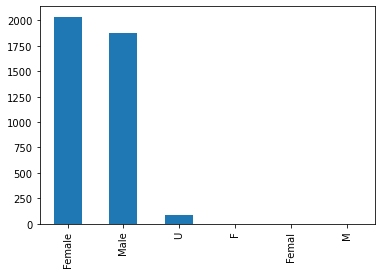

In [47]:
CustomerDemo['gender'].value_counts().plot(kind= 'bar')

In [48]:
CustomerDemo['gender']= CustomerDemo['gender'].replace(to_replace= ['Female', 'Femal'], value= 'F')
CustomerDemo['gender']= CustomerDemo['gender'].replace(to_replace= 'Male', value= 'M')

<AxesSubplot:ylabel='wealth_segment'>

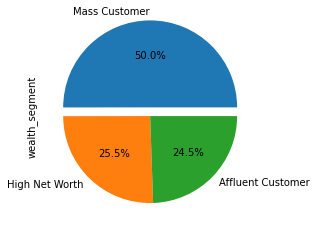

In [49]:
CustomerDemo['wealth_segment' ].value_counts().plot(kind= 'pie', autopct='%1.1f%%', explode=(0.1, 0, 0))

<AxesSubplot:ylabel='job_industry_category'>

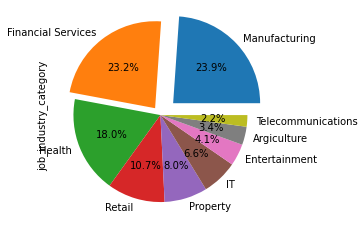

In [50]:
CustomerDemo['job_industry_category'].value_counts().plot(kind= 'pie', autopct='%1.1f%%', explode=(0.2, 0.1, 0, 0, 0, 0, 0, 0, 0))

(<Figure size 432x288 with 3 Axes>,
 {('Yes', 'F'): (0.0, 0.0, 0.5036084891869734, 0.5040507290003402),
  ('Yes', 'M'): (0.0,
   0.5073619872784859,
   0.5036084891869734,
   0.464786796848415),
  ('Yes', 'U'): (0.0,
   0.9754600424050467,
   0.5036084891869734,
   0.02453995759495324),
  ('No', 'F'): (0.5085836135650829,
   0.0,
   0.49141638643491725,
   0.509011652275966),
  ('No', 'M'): (0.5085836135650829,
   0.5123229105541117,
   0.49141638643491725,
   0.46575572135132864),
  ('No', 'U'): (0.5085836135650829,
   0.9813898901835861,
   0.49141638643491725,
   0.01861010981641379)})

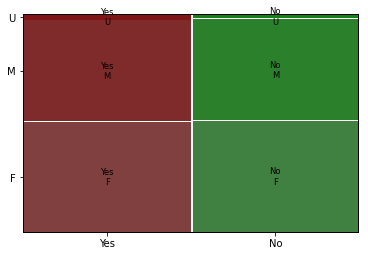

In [52]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(CustomerDemo, ['owns_car', 'gender'])# 'job_industry_category'])

In [54]:
CustomerAddress

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9
...,...,...,...,...,...,...
3994,3999,1482 Hauk Trail,3064,VIC,Australia,3
3995,4000,57042 Village Green Point,4511,QLD,Australia,6
3996,4001,87 Crescent Oaks Alley,2756,NSW,Australia,10
3997,4002,8194 Lien Street,4032,QLD,Australia,7


In [55]:
CustomerAddress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [56]:
CustomerAddress.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [57]:
CustomerAddress.nunique(axis= 0)

customer_id           3999
address               3996
postcode               873
state                    5
country                  1
property_valuation      12
dtype: int64

<AxesSubplot:>

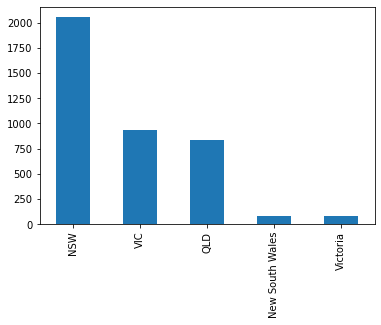

In [58]:
CustomerAddress['state'].value_counts().plot(kind= 'bar')

In [59]:
CustomerAddress['state']= CustomerAddress['state'].replace(to_replace= 'New South Wales', value= 'NSW')
CustomerAddress['state']= CustomerAddress['state'].replace(to_replace= 'Victoria', value= 'VIC')

<AxesSubplot:>

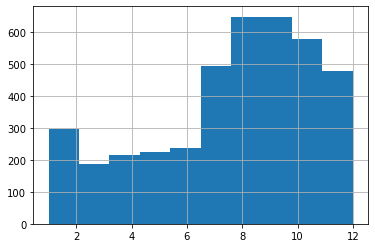

In [61]:
CustomerAddress['property_valuation'].hist()

### Join tables

In [62]:
Customer= pd.merge(CustomerDemo, CustomerAddress, left_on='customer_id', right_on='customer_id', how= 'inner')
Customer

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,060 Morning Avenue,2016,NSW,Australia,10
1,2,Eli,Bockman,M,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,6 Meadow Vale Court,2153,NSW,Australia,10
2,4,Talbot,NaN,M,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0,0 Holy Cross Court,4211,QLD,Australia,9
3,5,Sheila-kathryn,Calton,F,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0,17979 Del Mar Point,2448,NSW,Australia,4
4,6,Curr,Duckhouse,M,35,1966-09-16,NaN,Retail,High Net Worth,N,ðµ ð ð ð,Yes,13.0,9 Oakridge Court,3216,VIC,Australia,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3990,3996,Rosalia,Halgarth,F,8,1975-08-09,VP Product Management,Health,Mass Customer,N,-100,No,19.0,0 Transport Center,3977,VIC,Australia,6
3991,3997,Blanch,Nisuis,F,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,â¦testâ§,Yes,1.0,4 Dovetail Crossing,2350,NSW,Australia,2
3992,3998,Sarene,Woolley,U,60,NaT,Assistant Manager,IT,High Net Worth,N,NaN,No,NaN,736 Roxbury Junction,2540,NSW,Australia,6
3993,3999,Patrizius,NaN,M,11,1973-10-24,NaN,Manufacturing,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,Yes,10.0,1482 Hauk Trail,3064,VIC,Australia,3


In [63]:
Customer= Customer[Customer['customer_id']<=3500]
Customer= Customer[Customer['DOB'].dt.year != 1843]
#Customer= Customer[Customer['deceased_indicator'] == 'N']
Customer['gender']= Customer['gender'].replace(to_replace= ['Female', 'Femal'], value= 'F')
Customer['gender']= Customer['gender'].replace(to_replace= ['Male'], value= 'M')
Customer['state']= Customer['state'].replace(to_replace= 'New South Wales', value= 'NSW')
Customer['state']= Customer['state'].replace(to_replace= 'Victoria', value= 'VIC')

### Create metrics (RFM):
Recency,
Frequency,
Monetary (Revenue and Profit),
Period (Between the 1st and the last purchase)

In [64]:
#Create the total profit and revenue columns
df= pd.merge(Transactions, Customer, left_on= "customer_id", right_on= 'customer_id', how= "right")

df.loc[df['order_status']== 'Cancelled', 'total_revenue']= 0
df.loc[df['order_status']== 'Cancelled', 'total_profit']= 0


Profit= df.groupby('customer_id').agg({'profit': 'sum'})
Revenue= df.groupby('customer_id').agg({'list_price': 'sum'})

Customer.loc[:, 'profit']= np.array(Profit)
Customer.loc[:, 'revenue']= np.array(Revenue)


#Add frequency and recency columns

freq= df.groupby('customer_id').agg({'customer_id': 'count'})
rec= df.groupby('customer_id').agg({'transaction_date': 'max'})
first= df.groupby('customer_id').agg({'transaction_date': 'min'})

Customer.loc[:, 'frequency']= np.array(freq)
Customer.loc[:, 'recency']= np.array(rec)
Customer.loc[:, 'period']= np.array(rec)- np.array(first)

#Since we will use k means, recency will be calculated as the number of days from the start of the year to the last purchase
Customer['recency']= Customer['recency']- Customer['recency'].min()
Customer['recency']= Customer['recency'].dt.days

#Customer['first_purchase']= Customer['first_purchase'].max()- Customer['first_purchase'] 
Customer['period']= Customer['period'].dt.days

Customer.loc[Customer['frequency'].isnull(), 'frequency']= 0
Customer.loc[Customer['recency'].isnull(), 'recency' ]= -1
Customer.loc[Customer['period'].isnull(), 'period' ]= -1




Customer[Customer['profit']==0]


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,address,postcode,state,country,property_valuation,profit,revenue,frequency,recency,period
846,852,Andie,Bonney,F,37,2000-11-04,Compensation Analyst,Financial Services,Affluent Customer,N,...,641 Waywood Lane,2336,NSW,Australia,7,0.0,0.0,1,-1.0,-1.0
863,869,Addia,Abels,F,7,1984-03-11,Account Representative I,Financial Services,High Net Worth,N,...,6712 Nova Crossing,2065,NSW,Australia,10,0.0,0.0,1,-1.0,-1.0
1367,1373,Shaylynn,Epsley,F,3,1958-09-23,Director of Sales,Financial Services,Mass Customer,N,...,939 Hermina Drive,3198,VIC,Australia,8,0.0,0.0,1,-1.0,-1.0
2068,2074,Roslyn,Rawdall,F,90,1997-06-11,NaN,Financial Services,Mass Customer,N,...,0442 Debra Point,2281,NSW,Australia,7,0.0,0.0,1,-1.0,-1.0
2654,2660,Hunt,Scollard,M,44,1963-11-15,NaN,Retail,High Net Worth,N,...,68128 Leroy Street,4213,QLD,Australia,8,0.0,0.0,1,-1.0,-1.0
3223,3229,Carrol,Gheorghie,M,69,1964-10-18,Sales Representative,Retail,High Net Worth,N,...,2 Del Sol Circle,3012,VIC,Australia,1,0.0,0.0,1,-1.0,-1.0
3230,3236,Edsel,Arguile,M,37,1993-04-01,NaN,Manufacturing,Mass Customer,N,...,1 Roth Pass,3199,VIC,Australia,4,0.0,0.0,1,-1.0,-1.0


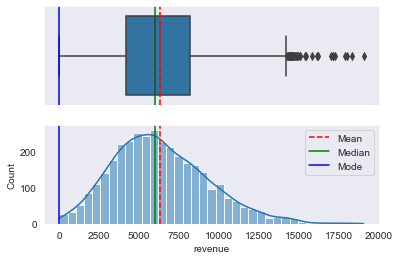

In [66]:
Customer
sns.set_style("dark")
f, (box, hist)= plt.subplots(2, sharex= True)

mean= Customer['revenue'].mean()
median= Customer['revenue'].median()
mode= Customer['revenue'].mode().values

sns.boxplot(data= Customer, x= 'revenue', ax= box)
box.axvline(mean, color='r', linestyle='--')
box.axvline(median, color='g', linestyle='-')
box.axvline(mode[0], color='b', linestyle='-')

sns.histplot(data= Customer, x= 'revenue', ax= hist, kde=True)
hist.axvline(mean, color='r', linestyle='--', label="Mean")
hist.axvline(median, color='g', linestyle='-', label="Median")
hist.axvline(mode[0], color='b', linestyle='-', label="Mode")


hist.legend()

box.set(xlabel='')
plt.show()



> The distribution is just slightly right skewed, nearly normally distributed

In [67]:
#How do revenue and profit monthly generated?

In [82]:
#Transactions["product_first_sold_date"]= pd.to_datetime(Transactions.product_first_sold_date, format='%Y/%m/%d')
dftrans= Transactions[Transactions['product_first_sold_date'].notna()]
dftrans['month'] = [d.strftime('%b') for d in dftrans.product_first_sold_date]

In [84]:
dftrans['month']

0        Dec
1        Mar
2        Jul
3        Dec
4        Aug
        ... 
19921    Mar
19941    Oct
19967    Jul
19987    Apr
19988    Jan
Name: month, Length: 19803, dtype: object

In [87]:
dftrans.loc[dftrans['order_status']== 'Cancelled', 'revenue']= 0
dftrans.loc[dftrans['order_status']== 'Cancelled', 'profit']= 0
ByMonth= dftrans.groupby('month').agg({'list_price': 'sum',
                                       'profit': 'sum'
                                      })

In [96]:
ByMonth

,list_price,profit
month,,
Apr,1575853.70,8.643251e+05
Aug,3305924.89,1.622010e+06
Dec,1793456.29,9.351185e+05
Feb,920608.83,4.503358e+05
Jan,1145708.30,5.182860e+05
Jul,2274122.63,1.258452e+06
Jun,1220631.46,6.158335e+05
Mar,1634971.53,7.257933e+05
May,2719071.47,1.462011e+06


> Trend: go up, peak in August and go down 

> Revenue in August is 3.5 times of that in February -> we may want to check the seasonal pattern if transaction data before 2017 is available 

### Customer Segmentation

In [303]:
def Encode():
    
    global x
    car_code= {'No': 0, 'Yes': 1}
    x['owns_car']= x.owns_car.map(car_code)

    gender_code= {'M': 0, 'F': 1, 'U': 2}
    x['gender']= x.gender.map(gender_code)

    wealth_code= {'Mass Customer': 0, 'Affluent Customer': 1, 'High Net Worth': 2}
    x['wealth_segment']= x.wealth_segment.map(wealth_code)
    
    onehot1= pd.get_dummies(x['job_industry_category'])
    onehot2= pd.get_dummies(x['job_title'])
    x= x.join(onehot1)
    x= x.join(onehot2)
    x= x.drop(['owns_car',  'gender', 'wealth_segment', 'job_industry_category', 'job_title'], axis= 1)
    print(x)

In [304]:
x= Customer[[ "customer_id", "gender", "past_3_years_bike_related_purchases", "wealth_segment", 'DOB', "property_valuation", 'tenure', 'owns_car', 'job_industry_category', 'job_title', "period", "frequency", "recency", "revenue", "profit"]]
x['DOB']= x['DOB'].dt.year

In [305]:
Encode()

      customer_id  past_3_years_bike_related_purchases     DOB  \
0               1                                   93  1953.0   
1               2                                   81  1980.0   
2               4                                   33  1961.0   
3               5                                   56  1977.0   
4               6                                   35  1966.0   
...           ...                                  ...     ...   
3490         3496                                   99  1986.0   
3491         3497                                   73  1986.0   
3492         3498                                   28  1995.0   
3493         3499                                   29  1979.0   
3494         3500                                   71  1967.0   

      property_valuation  tenure  period  frequency  recency  revenue  \
0                     10    11.0   352.0         11    346.0  9084.45   
1                     10    16.0   112.0          3    225.0 

In [306]:
from sklearn.preprocessing import StandardScaler

scale= StandardScaler()

In [307]:
x= x.loc[x['revenue']!= 0]

x['avg_daily_spend']= x['revenue']/x['period']
x.loc[x['period']== 0, 'avg_daily_spend']= -1

RFM= ["recency", "frequency", "revenue", "profit"]#, "period"]#, "avg_daily_spend"]
x[RFM]= scale.fit_transform(x[RFM])

In [279]:
# from sklearn.decomposition import PCA

# pca= PCA().fit(x[RFM])
# print(pca.explained_variance_ratio_)
# print(pca.components_)
# cumulative=np.cumsum(pca.explained_variance_ratio_)
# plt.step([i for i in range(len(cumulative))],cumulative)
# plt.show()

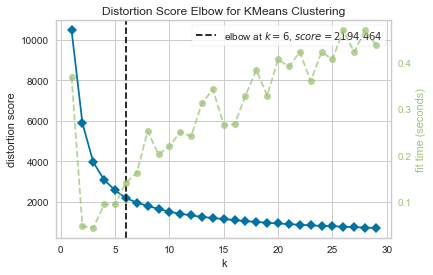

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [280]:
%matplotlib inline
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

visualizer= KElbowVisualizer(KMeans(), k=(1,30)).fit(x[RFM])
visualizer.show()

In [308]:
pd.set_option('display.max_columns', None)

km= KMeans(n_clusters= 6, random_state= 42)
#Fitting the input data
km.fit(x[RFM])
#predicting the labels of the input data
y=km.predict(x[RFM])
#adding the labels to a column named label
x["label"] = y
#The new dataframe with the clustering done
x.head()

,customer_id,past_3_years_bike_related_purchases,DOB,property_valuation,tenure,period,frequency,recency,revenue,profit,Argiculture,Entertainment,Financial Services,Health,IT,Manufacturing,Property,Retail,Telecommunications,Account Coordinator,Account Executive,Account Representative I,Account Representative II,Account Representative III,Account Representative IV,Accountant I,Accountant II,Accountant III,Accountant IV,Accounting Assistant I,Accounting Assistant II,Accounting Assistant III,Accounting Assistant IV,Actuary,Administrative Assistant I,Administrative Assistant II,Administrative Assistant III,Administrative Assistant IV,Administrative Officer,Analog Circuit Design manager,Analyst Programmer,Assistant Manager,Assistant Media Planner,Assistant Professor,Associate Professor,Automation Specialist I,Automation Specialist II,Automation Specialist III,Automation Specialist IV,Biostatistician I,Biostatistician II,Biostatistician III,Biostatistician IV,Budget/Accounting Analyst I,Budget/Accounting Analyst II,Budget/Accounting Analyst III,Budget/Accounting Analyst IV,Business Systems Development Analyst,Chemical Engineer,Chief Design Engineer,Civil Engineer,Clinical Specialist,Community Outreach Specialist,Compensation Analyst,Computer Systems Analyst I,Computer Systems Analyst II,Computer Systems Analyst III,Computer Systems Analyst IV,Cost Accountant,Data Coordiator,Database Administrator I,Database Administrator II,Database Administrator III,Database Administrator IV,Dental Hygienist,Design Engineer,Desktop Support Technician,Developer I,Developer II,Developer III,Developer IV,Director of Sales,Editor,Electrical Engineer,Engineer I,Engineer II,Engineer III,Engineer IV,Environmental Specialist,Environmental Tech,Executive Secretary,Financial Advisor,Financial Analyst,Food Chemist,GIS Technical Architect,General Manager,Geological Engineer,Geologist I,Geologist II,Geologist III,Geologist IV,Graphic Designer,Health Coach I,Health Coach II,Health Coach III,Health Coach IV,Help Desk Operator,Help Desk Technician,Human Resources Assistant I,Human Resources Assistant II,Human Resources Assistant III,Human Resources Assistant IV,Human Resources Manager,Information Systems Manager,Internal Auditor,Junior Executive,Legal Assistant,Librarian,Marketing Assistant,Marketing Manager,Mechanical Systems Engineer,Media Manager I,Media Manager II,Media Manager III,Media Manager IV,Nuclear Power Engineer,Nurse,Nurse Practicioner,Occupational Therapist,Office Assistant I,Office Assistant II,Office Assistant III,Office Assistant IV,Operator,Paralegal,Payment Adjustment Coordinator,Pharmacist,Physical Therapy Assistant,Product Engineer,Professor,Programmer Analyst I,Programmer Analyst II,Programmer Analyst III,Programmer Analyst IV,Programmer I,Programmer II,Programmer III,Programmer IV,Project Manager,Quality Control Specialist,Quality Engineer,Recruiter,Recruiting Manager,Registered Nurse,Research Assistant I,Research Assistant II,Research Assistant III,Research Assistant IV,Research Associate,Research Nurse,Safety Technician I,Safety Technician II,Safety Technician III,Safety Technician IV,Sales Associate,Sales Representative,Senior Cost Accountant,Senior Developer,Senior Editor,Senior Financial Analyst,Senior Quality Engineer,Senior Sales Associate,Social Worker,Software Consultant,Software Engineer I,Software Engineer II,Software Engineer III,Software Engineer IV,Software Test Engineer I,Software Test Engineer II,Software Test Engineer III,Software Test Engineer IV,Speech Pathologist,Staff Accountant I,Staff Accountant II,Staff Accountant III,Staff Accountant IV,Staff Scientist,Statistician I,Statistician II,Statistician III,Statistician IV,Structural Analysis Engineer,Structural Engineer,Systems Administrator I,Systems Administrator II,Systems Administrator III,Systems Administrator IV,Tax Accountant,Teacher,Technical Writer,VP Accounting,VP Marketing,VP Product Management,VP Quality Control,VP Sales,Web Designer I,Web Designer II,Web Design

In [309]:
CountCluster= x.groupby(by= "label").count()
MeanCluster= x.groupby(by= "label").mean().round(3)

In [310]:
CountCluster

,customer_id,past_3_years_bike_related_purchases,DOB,property_valuation,tenure,period,frequency,recency,revenue,profit,Argiculture,Entertainment,Financial Services,Health,IT,Manufacturing,Property,Retail,Telecommunications,Account Coordinator,Account Executive,Account Representative I,Account Representative II,Account Representative III,Account Representative IV,Accountant I,Accountant II,Accountant III,Accountant IV,Accounting Assistant I,Accounting Assistant II,Accounting Assistant III,Accounting Assistant IV,Actuary,Administrative Assistant I,Administrative Assistant II,Administrative Assistant III,Administrative Assistant IV,Administrative Officer,Analog Circuit Design manager,Analyst Programmer,Assistant Manager,Assistant Media Planner,Assistant Professor,Associate Professor,Automation Specialist I,Automation Specialist II,Automation Specialist III,Automation Specialist IV,Biostatistician I,Biostatistician II,Biostatistician III,Biostatistician IV,Budget/Accounting Analyst I,Budget/Accounting Analyst II,Budget/Accounting Analyst III,Budget/Accounting Analyst IV,Business Systems Development Analyst,Chemical Engineer,Chief Design Engineer,Civil Engineer,Clinical Specialist,Community Outreach Specialist,Compensation Analyst,Computer Systems Analyst I,Computer Systems Analyst II,Computer Systems Analyst III,Computer Systems Analyst IV,Cost Accountant,Data Coordiator,Database Administrator I,Database Administrator II,Database Administrator III,Database Administrator IV,Dental Hygienist,Design Engineer,Desktop Support Technician,Developer I,Developer II,Developer III,Developer IV,Director of Sales,Editor,Electrical Engineer,Engineer I,Engineer II,Engineer III,Engineer IV,Environmental Specialist,Environmental Tech,Executive Secretary,Financial Advisor,Financial Analyst,Food Chemist,GIS Technical Architect,General Manager,Geological Engineer,Geologist I,Geologist II,Geologist III,Geologist IV,Graphic Designer,Health Coach I,Health Coach II,Health Coach III,Health Coach IV,Help Desk Operator,Help Desk Technician,Human Resources Assistant I,Human Resources Assistant II,Human Resources Assistant III,Human Resources Assistant IV,Human Resources Manager,Information Systems Manager,Internal Auditor,Junior Executive,Legal Assistant,Librarian,Marketing Assistant,Marketing Manager,Mechanical Systems Engineer,Media Manager I,Media Manager II,Media Manager III,Media Manager IV,Nuclear Power Engineer,Nurse,Nurse Practicioner,Occupational Therapist,Office Assistant I,Office Assistant II,Office Assistant III,Office Assistant IV,Operator,Paralegal,Payment Adjustment Coordinator,Pharmacist,Physical Therapy Assistant,Product Engineer,Professor,Programmer Analyst I,Programmer Analyst II,Programmer Analyst III,Programmer Analyst IV,Programmer I,Programmer II,Programmer III,Programmer IV,Project Manager,Quality Control Specialist,Quality Engineer,Recruiter,Recruiting Manager,Registered Nurse,Research Assistant I,Research Assistant II,Research Assistant III,Research Assistant IV,Research Associate,Research Nurse,Safety Technician I,Safety Technician II,Safety Technician III,Safety Technician IV,Sales Associate,Sales Representative,Senior Cost Accountant,Senior Developer,Senior Editor,Senior Financial Analyst,Senior Quality Engineer,Senior Sales Associate,Social Worker,Software Consultant,Software Engineer I,Software Engineer II,Software Engineer III,Software Engineer IV,Software Test Engineer I,Software Test Engineer II,Software Test Engineer III,Software Test Engineer IV,Speech Pathologist,Staff Accountant I,Staff Accountant II,Staff Accountant III,Staff Accountant IV,Staff Scientist,Statistician I,Statistician II,Statistician III,Statistician IV,Structural Analysis Engineer,Structural Engineer,Systems Administrator I,Systems Administrator II,Systems Administrator III,Systems Administrator IV,Tax Accountant,Teacher,Technical Writer,VP Accounting,VP Marketing,VP Product Management,VP Quality Control,VP Sales,Web Designer I,Web Designer II,Web Design

In [311]:
MeanCluster

,customer_id,past_3_years_bike_related_purchases,DOB,property_valuation,tenure,period,frequency,recency,revenue,profit,Argiculture,Entertainment,Financial Services,Health,IT,Manufacturing,Property,Retail,Telecommunications,Account Coordinator,Account Executive,Account Representative I,Account Representative II,Account Representative III,Account Representative IV,Accountant I,Accountant II,Accountant III,Accountant IV,Accounting Assistant I,Accounting Assistant II,Accounting Assistant III,Accounting Assistant IV,Actuary,Administrative Assistant I,Administrative Assistant II,Administrative Assistant III,Administrative Assistant IV,Administrative Officer,Analog Circuit Design manager,Analyst Programmer,Assistant Manager,Assistant Media Planner,Assistant Professor,Associate Professor,Automation Specialist I,Automation Specialist II,Automation Specialist III,Automation Specialist IV,Biostatistician I,Biostatistician II,Biostatistician III,Biostatistician IV,Budget/Accounting Analyst I,Budget/Accounting Analyst II,Budget/Accounting Analyst III,Budget/Accounting Analyst IV,Business Systems Development Analyst,Chemical Engineer,Chief Design Engineer,Civil Engineer,Clinical Specialist,Community Outreach Specialist,Compensation Analyst,Computer Systems Analyst I,Computer Systems Analyst II,Computer Systems Analyst III,Computer Systems Analyst IV,Cost Accountant,Data Coordiator,Database Administrator I,Database Administrator II,Database Administrator III,Database Administrator IV,Dental Hygienist,Design Engineer,Desktop Support Technician,Developer I,Developer II,Developer III,Developer IV,Director of Sales,Editor,Electrical Engineer,Engineer I,Engineer II,Engineer III,Engineer IV,Environmental Specialist,Environmental Tech,Executive Secretary,Financial Advisor,Financial Analyst,Food Chemist,GIS Technical Architect,General Manager,Geological Engineer,Geologist I,Geologist II,Geologist III,Geologist IV,Graphic Designer,Health Coach I,Health Coach II,Health Coach III,Health Coach IV,Help Desk Operator,Help Desk Technician,Human Resources Assistant I,Human Resources Assistant II,Human Resources Assistant III,Human Resources Assistant IV,Human Resources Manager,Information Systems Manager,Internal Auditor,Junior Executive,Legal Assistant,Librarian,Marketing Assistant,Marketing Manager,Mechanical Systems Engineer,Media Manager I,Media Manager II,Media Manager III,Media Manager IV,Nuclear Power Engineer,Nurse,Nurse Practicioner,Occupational Therapist,Office Assistant I,Office Assistant II,Office Assistant III,Office Assistant IV,Operator,Paralegal,Payment Adjustment Coordinator,Pharmacist,Physical Therapy Assistant,Product Engineer,Professor,Programmer Analyst I,Programmer Analyst II,Programmer Analyst III,Programmer Analyst IV,Programmer I,Programmer II,Programmer III,Programmer IV,Project Manager,Quality Control Specialist,Quality Engineer,Recruiter,Recruiting Manager,Registered Nurse,Research Assistant I,Research Assistant II,Research Assistant III,Research Assistant IV,Research Associate,Research Nurse,Safety Technician I,Safety Technician II,Safety Technician III,Safety Technician IV,Sales Associate,Sales Representative,Senior Cost Accountant,Senior Developer,Senior Editor,Senior Financial Analyst,Senior Quality Engineer,Senior Sales Associate,Social Worker,Software Consultant,Software Engineer I,Software Engineer II,Software Engineer III,Software Engineer IV,Software Test Engineer I,Software Test Engineer II,Software Test Engineer III,Software Test Engineer IV,Speech Pathologist,Staff Accountant I,Staff Accountant II,Staff Accountant III,Staff Accountant IV,Staff Scientist,Statistician I,Statistician II,Statistician III,Statistician IV,Structural Analysis Engineer,Structural Engineer,Systems Administrator I,Systems Administrator II,Systems Administrator III,Systems Administrator IV,Tax Accountant,Teacher,Technical Writer,VP Accounting,VP Marketing,VP Product Management,VP Quality Control,VP Sales,Web Designer I,Web Designer II,Web Design

<AxesSubplot:xlabel='label', ylabel='recency'>

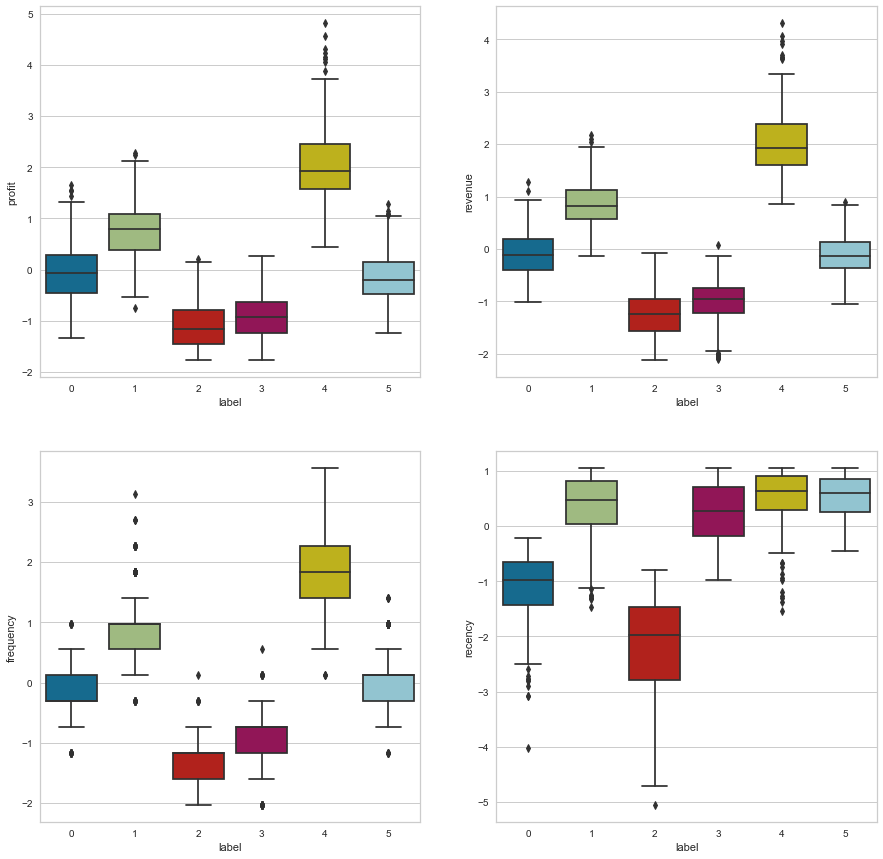

In [312]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
sns.boxplot(ax= axes[0, 0], x= 'label', y= 'profit', data= x)
#axes[0, 0].set_title('profit')
sns.boxplot(ax= axes[0, 1], x= 'label', y= 'revenue', data= x)
#axes[0, 1].set_title('revenue')
sns.boxplot(ax= axes[1, 0], x= 'label', y= 'frequency', data= x)
#axes[1, 0].set_title('frequency')
sns.boxplot(ax= axes[1, 1], x= 'label', y= 'recency', data= x)
#axes[1, 1].set_title('recency')


<AxesSubplot:xlabel='label', ylabel='period'>

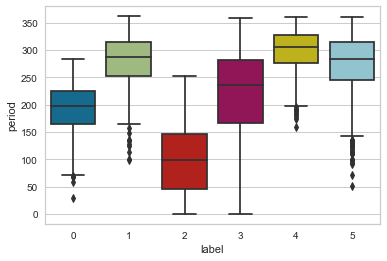

In [313]:
sns.boxplot(x= 'label', y= 'period', data= x)

<AxesSubplot:xlabel='label', ylabel='avg_daily_spend'>

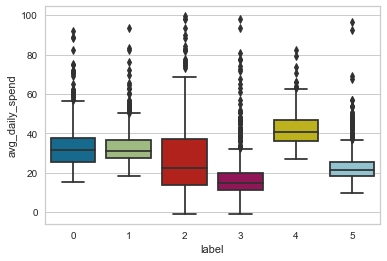

In [316]:
d= x.loc[x["avg_daily_spend"]< 100]
sns.boxplot(x= 'label', y= 'avg_daily_spend', data= d)

> Group 0: At Risk Customers (Need Attention)

> Group 1: Loyal Customers (High Tier)

> Group 2: Random Customers (Not passionate)

> Group 3: Loyal Customers (Low Tier)

> Group 4: Diamond Customers 

> Group 5: Loyal Customers (Mid Tier)